# Validating MARLEY Generation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readHepevt(filename, EvtNo):
    particles = []
    with open(filename, 'r') as f:
        while True:
            header = f.readline()
            if not header:
                break  # End of file
            parts = header.strip().split()
            if len(parts) < 2:
                continue
            n_particles = int(parts[1])
            event_id = EvtNo

            for _ in range(n_particles):
                line = f.readline()
                data = line.strip().split()
                if len(data) < 15:
                    continue
                particle = {
                    "NEVHEP": event_id,
                    "ISTHEP": int(data[0]),
                    "IDHEP": int(data[1]),
                    "JMOHEP1": int(data[2]),
                    "JMOHEP2": int(data[3]),
                    "JDAHEP1": int(data[4]),
                    "JDAHEP2": int(data[5]),
                    "PHEP1": float(data[6]),
                    "PHEP2": float(data[7]),
                    "PHEP3": float(data[8]),
                    "PHEP4": float(data[9]),
                    "PHEP5": float(data[10]),
                    "VHEP1": float(data[11]),
                    "VHEP2": float(data[12]),
                    "VHEP3": float(data[13]),
                    "VHEP4": float(data[14]),
                }
                particles.append(particle)

            EvtNo += 1
    return pd.DataFrame(particles)


## Read in the input files

Fermi transitions vs Gamow-Teller (GT) transitions

In [3]:
# Fermi
FermiFile = '/Users/yuntse/data/lartpc_rd/gampix/sn/garching/nh/marley_fermi/nueArCC_garching_nh_fermi_mxpyDir_00.hepevt'

In [4]:
FermiEvents = readHepevt( FermiFile, 0)
FermiEvents

,NEVHEP,ISTHEP,IDHEP,JMOHEP1,JMOHEP2,JDAHEP1,JDAHEP2,PHEP1,PHEP2,PHEP3,PHEP4,PHEP5,VHEP1,VHEP2,VHEP3,VHEP4
0,0,3,12,0,0,0,0,-0.013676,0.013676,0.000000,0.019341,0.000000e+00,0.0,0.0,0.0,0.0
1,0,3,1000180400,0,0,0,0,0.000000,0.000000,0.000000,37.224723,3.722472e+01,0.0,0.0,0.0,0.0
2,0,11,0,0,1,0,0,0.000000,0.000000,0.000000,4.383700,2.168455e-20,0.0,0.0,0.0,0.0
3,0,1,11,0,0,0,0,-0.011456,-0.002416,-0.007586,0.013959,5.109989e-04,0.0,0.0,0.0,0.0
4,0,1,1000190400,0,0,0,0,-0.002392,0.015452,0.004991,37.225720,3.722572e+01,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,999,1,11,0,0,0,0,0.006130,0.018879,-0.004939,0.020461,5.109989e-04,0.0,0.0,0.0,0.0
8873,999,1,1000190400,0,0,0,0,-0.023855,0.000230,0.004156,37.225724,3.722572e+01,0.0,0.0,0.0,0.0
8874,999,1,22,0,0,0,0,0.000088,0.000394,-0.001586,0.001636,0.000000e+00,0.0,0.0,0.0,0.0
8875,999,1,22,0,0,0,0,-0.000648,-0.001210,0.002346,0.002718,0.000000e+00,0.0,0.0,0.0,0.0


In [5]:
# GT
GTFile = '/Users/yuntse/data/lartpc_rd/gampix/sn/garching/nh/marley_gt/nueArCC_garching_nh_gt_mxpyDir_00.hepevt'

In [6]:
GTEvents = readHepevt( GTFile, 0)
GTEvents

,NEVHEP,ISTHEP,IDHEP,JMOHEP1,JMOHEP2,JDAHEP1,JDAHEP2,PHEP1,PHEP2,PHEP3,PHEP4,PHEP5,VHEP1,VHEP2,VHEP3,VHEP4
0,0,3,12,0,0,0,0,-0.020367,0.020367,0.000000,0.028804,0.000000e+00,0.0,0.0,0.0,0.0
1,0,3,1000180400,0,0,0,0,0.000000,0.000000,0.000000,37.224723,3.722472e+01,0.0,0.0,0.0,0.0
2,0,11,0,2,1,0,0,0.000000,0.000000,0.000000,4.508000,5.719182e-20,0.0,0.0,0.0,0.0
3,0,1,11,0,0,0,0,-0.017360,0.015525,0.000556,0.023302,5.109989e-04,0.0,0.0,0.0,0.0
4,0,1,1000190400,0,0,0,0,-0.001474,0.007593,0.001080,37.225717,3.722572e+01,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7882,999,1,11,0,0,0,0,0.009598,-0.020872,0.006017,0.023754,5.109989e-04,0.0,0.0,0.0,0.0
7883,999,1,1000190400,0,0,0,0,-0.029126,0.046264,-0.005950,37.225757,3.722572e+01,0.0,0.0,0.0,0.0
7884,999,1,22,0,0,0,0,-0.001748,-0.004549,0.000191,0.004877,0.000000e+00,0.0,0.0,0.0,0.0
7885,999,1,22,0,0,0,0,-0.000268,0.000672,-0.000268,0.000771,0.000000e+00,0.0,0.0,0.0,0.0


## $\gamma$ Multiplicity

In [7]:
FermiGammaMulti = FermiEvents[(FermiEvents.ISTHEP==1)&(FermiEvents.IDHEP==22)].groupby('NEVHEP').size().reset_index(name='gMultiplicity')

In [8]:
FermiGammaMulti['gMultiplicity'].min(), FermiGammaMulti['gMultiplicity'].max()

(2, 5)

In [9]:
GTGammaMulti = GTEvents[(GTEvents.ISTHEP==1)&(GTEvents.IDHEP==22)].groupby('NEVHEP').size().reset_index(name='gMultiplicity')

In [10]:
GTGammaMulti['gMultiplicity'].min(), GTGammaMulti['gMultiplicity'].max()

(1, 6)

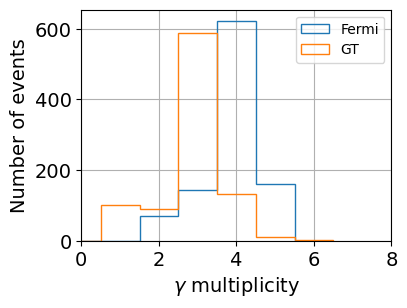

In [11]:
fig, ax = plt.subplots( figsize = (4, 3) )  

nMulti = max(FermiGammaMulti['gMultiplicity'].max(), GTGammaMulti['gMultiplicity'].max())
ax.hist(FermiGammaMulti['gMultiplicity'], bins = range(0, nMulti+2), align='left', histtype = 'step', label = 'Fermi')
ax.hist(GTGammaMulti['gMultiplicity'], bins = range(0, nMulti+2), align='left', histtype = 'step', label = 'GT')
ax.set_xlabel( r'$\gamma$ multiplicity', fontsize = 14 )
ax.set_ylabel( r'Number of events', fontsize = 14 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, nMulti+2] )
ax.legend()

ax.grid(":")

## Electron energy

In [12]:
FermiE = FermiEvents[(FermiEvents.ISTHEP==1)&(FermiEvents.IDHEP==11)].copy()
FermiE

,NEVHEP,ISTHEP,IDHEP,JMOHEP1,JMOHEP2,JDAHEP1,JDAHEP2,PHEP1,PHEP2,PHEP3,PHEP4,PHEP5,VHEP1,VHEP2,VHEP3,VHEP4
3,0,1,11,0,0,0,0,-0.011456,-0.002416,-0.007586,0.013959,0.000511,0.0,0.0,0.0,0.0
11,1,1,11,0,0,0,0,-0.000806,-0.002139,0.007020,0.007400,0.000511,0.0,0.0,0.0,0.0
20,2,1,11,0,0,0,0,0.006226,-0.004487,-0.028602,0.029619,0.000511,0.0,0.0,0.0,0.0
28,3,1,11,0,0,0,0,0.012011,0.014025,-0.010846,0.021421,0.000511,0.0,0.0,0.0,0.0
37,4,1,11,0,0,0,0,-0.011097,0.011568,-0.015548,0.022337,0.000511,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,995,1,11,0,0,0,0,0.003623,-0.013921,-0.011059,0.018151,0.000511,0.0,0.0,0.0,0.0
8845,996,1,11,0,0,0,0,0.025089,-0.005721,0.016138,0.030379,0.000511,0.0,0.0,0.0,0.0
8854,997,1,11,0,0,0,0,-0.019728,-0.008766,-0.002715,0.021764,0.000511,0.0,0.0,0.0,0.0
8863,998,1,11,0,0,0,0,-0.004414,0.011988,-0.012473,0.017862,0.000511,0.0,0.0,0.0,0.0


In [13]:
GTE = GTEvents[(GTEvents.ISTHEP==1)&(GTEvents.IDHEP==11)].copy()

In [14]:
FermiE.PHEP4.max(), GTE.PHEP4.max()

(0.05742692879659831, 0.053899872114375726)

In [15]:
maxEE = max(FermiE.PHEP4.max(), GTE.PHEP4.max())

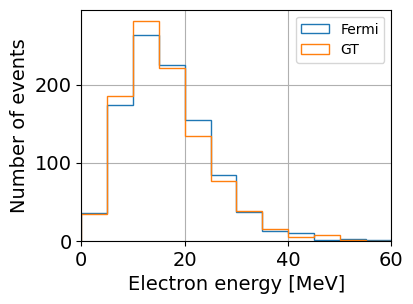

In [16]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(FermiE.PHEP4*1000, bins = np.linspace(0, 60, 13), histtype = 'step', label = 'Fermi')
ax.hist(GTE.PHEP4*1000, bins = np.linspace(0, 60, 13), histtype = 'step', label = 'GT')
ax.set_xlabel( r'Electron energy [MeV]', fontsize = 14 )
ax.set_ylabel( r'Number of events', fontsize = 14 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 60] )
ax.legend()

ax.grid(":")

## Electron direction

In [17]:
FermiE['costh'] = (-FermiE.PHEP1+FermiE.PHEP2)/np.sqrt((FermiE.PHEP1**2+FermiE.PHEP2**2+FermiE.PHEP3**2)*2)
GTE['costh'] = (-GTE.PHEP1+GTE.PHEP2)/np.sqrt((GTE.PHEP1**2+GTE.PHEP2**2+GTE.PHEP3**2)*2)

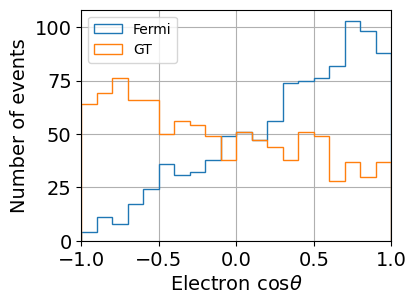

In [18]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(FermiE.costh, bins = np.linspace(-1, 1, 21), histtype = 'step', label = 'Fermi')
ax.hist(GTE.costh, bins = np.linspace(-1, 1, 21), histtype = 'step', label = 'GT')
ax.set_xlabel( r'Electron cos$\theta$', fontsize = 14 )
ax.set_ylabel( r'Number of events', fontsize = 14 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [-1, 1] )
ax.legend()

ax.grid(":")

## $\gamma$ energy

In [19]:
FermiG = FermiEvents[(FermiEvents.ISTHEP==1)&(FermiEvents.IDHEP==22)]
GTG = GTEvents[(GTEvents.ISTHEP==1)&(GTEvents.IDHEP==22)]

In [20]:
FermiG.PHEP4.max(), GTG.PHEP4.max()

(0.0027494338939298003, 0.012822731055557248)

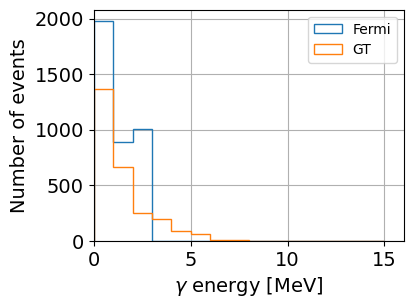

In [21]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(FermiG.PHEP4*1000, bins = np.linspace(0, 15, 16), histtype = 'step', label = 'Fermi')
ax.hist(GTG.PHEP4*1000, bins = np.linspace(0, 15, 16), histtype = 'step', label = 'GT')
ax.set_xlabel( r'$\gamma$ energy [MeV]', fontsize = 14 )
ax.set_ylabel( r'Number of events', fontsize = 14 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 16] )
ax.legend()

ax.grid(":")